In [9]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [20]:
from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

In [21]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [22]:
# CanaryS Gardenplace JAN-MAR-2020
df_cgp1 = pd.read_csv('X:\RA_AirQuality\Datasets\canarys-garden-place\year-2020.csv')
df_cgp1.head()

DateTime  datetime(Garden Place (CS8) |Canary-S)  \
0  1/1/2020 1:00                                     NaN   
1  1/1/2020 2:00                                     NaN   
2  1/1/2020 3:00                                     NaN   
3  1/1/2020 4:00                                     NaN   
4  1/1/2020 5:00                                     NaN   

   PM2_5(Garden Place (CS8) |Canary-S)  PM10(Garden Place (CS8) |Canary-S)  \
0                                11.21                               13.41   
1                                18.54                               21.28   
2                                21.53                               24.61   
3                                33.45                               38.93   
4                                40.22                               47.52   

   Temp(Garden Place (CS8) |Canary-S)  
0                               37.70  
1                               34.52  
2                               32.38  
3                               29.77  
4                               28.13

In [23]:
df_cgp1_mod = df_cgp1.drop(columns=["datetime(Garden Place (CS8) |Canary-S)"])

In [24]:
df_cgp1_mod2 = df_cgp1_mod.rename(columns={"PM2_5(Garden Place (CS8) |Canary-S)":"PM2.5", "PM10(Garden Place (CS8) |Canary-S)":"PM10", "Temp(Garden Place (CS8) |Canary-S)":"Temp"})
df_cgp1_mod2.head()

DateTime  PM2.5   PM10   Temp
0  1/1/2020 1:00  11.21  13.41  37.70
1  1/1/2020 2:00  18.54  21.28  34.52
2  1/1/2020 3:00  21.53  24.61  32.38
3  1/1/2020 4:00  33.45  38.93  29.77
4  1/1/2020 5:00  40.22  47.52  28.13

In [25]:
df_cgp1_mod2['DateTime'] = pd.to_datetime(df_cgp1_mod2.DateTime)
df_cgp1_mod2.tail()

DateTime  PM2.5   PM10   Temp
8264 2020-12-31 20:00:00  21.49  22.90  58.56
8265 2020-12-31 21:00:00  22.03  23.41  61.09
8266 2020-12-31 22:00:00  14.06  15.05  58.54
8267 2020-12-31 23:00:00  15.09  16.29  50.63
8268 2021-01-01 00:00:00  26.75  28.57  43.54

In [26]:
df_cgp1_mod2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8269 entries, 0 to 8268
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  8269 non-null   datetime64[ns]
 1   PM2.5     8269 non-null   float64       
 2   PM10      8269 non-null   float64       
 3   Temp      8269 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 258.5 KB


In [27]:
print ("Rows     : " ,df_cgp1_mod2.shape[0])
print ("Columns  : " ,df_cgp1_mod2.shape[1])
print ("\nFeatures : \n" ,df_cgp1_mod2.columns.tolist())
print ("\nMissing values :  ", df_cgp1_mod2.isnull().any())
print ("\nUnique values :  \n",df_cgp1_mod2.nunique())

Rows     :  8269
Columns  :  4

Features : 
 ['DateTime', 'PM2.5', 'PM10', 'Temp']

Missing values :   DateTime    False
PM2.5       False
PM10        False
Temp        False
dtype: bool

Unique values :  
 DateTime    8269
PM2.5       2700
PM10        2882
Temp        5158
dtype: int64


In [28]:
df_cgp1_mod2.describe()

PM2.5         PM10         Temp
count  8269.000000  8269.000000  8269.000000
mean      9.938595    11.534113    58.797752
std      11.690090    14.039653    21.735710
min       0.000000     0.000000    -1.000000
25%       2.410000     2.810000    40.940000
50%       5.590000     6.340000    58.960000
75%      12.750000    14.240000    74.770000
max     182.530000   194.890000   115.330000

In [29]:
df_cgp1_mod2_non_indexed=df_cgp1_mod2.copy()

In [30]:
df_cgp1_mod2 = df_cgp1_mod2.set_index('DateTime')

In [31]:
df_cgp1_mod2.index

DatetimeIndex(['2020-01-01 01:00:00', '2020-01-01 02:00:00',
               '2020-01-01 03:00:00', '2020-01-01 04:00:00',
               '2020-01-01 05:00:00', '2020-01-01 06:00:00',
               '2020-01-01 07:00:00', '2020-01-01 08:00:00',
               '2020-01-01 09:00:00', '2020-01-01 10:00:00',
               ...
               '2020-12-31 15:00:00', '2020-12-31 16:00:00',
               '2020-12-31 17:00:00', '2020-12-31 18:00:00',
               '2020-12-31 19:00:00', '2020-12-31 20:00:00',
               '2020-12-31 21:00:00', '2020-12-31 22:00:00',
               '2020-12-31 23:00:00', '2021-01-01 00:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=8269, freq=None)

In [32]:
# Easy to locate using index: Example below
# df_cgp1_mod2.loc['2020-01-01':'2020-01-03']
df_cgp1_mod2.loc['2020-01-01 01:00:00':'2020-01-01 15:00:00']

PM2.5   PM10   Temp
DateTime                                
2020-01-01 01:00:00  11.21  13.41  37.70
2020-01-01 02:00:00  18.54  21.28  34.52
2020-01-01 03:00:00  21.53  24.61  32.38
2020-01-01 04:00:00  33.45  38.93  29.77
2020-01-01 05:00:00  40.22  47.52  28.13
2020-01-01 06:00:00  27.81  31.25  28.67
2020-01-01 07:00:00  24.73  27.89  30.12
2020-01-01 08:00:00  23.71  26.67  29.26
2020-01-01 09:00:00  20.71  23.10  28.27
2020-01-01 10:00:00  10.10  11.73  29.70
2020-01-01 11:00:00   5.40   6.33  30.22
2020-01-01 12:00:00   3.23   3.77  30.19
2020-01-01 13:00:00   3.75   4.62  28.86
2020-01-01 14:00:00   2.55   3.10  31.55
2020-01-01 15:00:00   2.16   2.53  34.27

In [33]:
data_PM25 = df_cgp1_mod2['PM2.5']
data_PM25.head()

DateTime
2020-01-01 01:00:00    11.21
2020-01-01 02:00:00    18.54
2020-01-01 03:00:00    21.53
2020-01-01 04:00:00    33.45
2020-01-01 05:00:00    40.22
Name: PM2.5, dtype: float64

<AxesSubplot:xlabel='DateTime'>

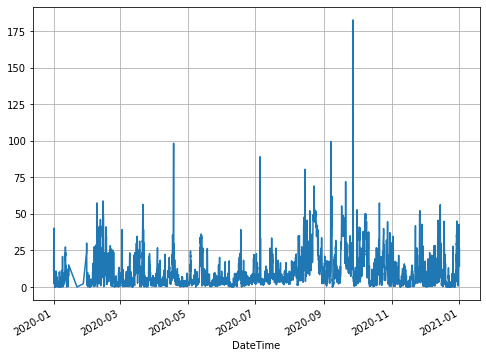

In [34]:
# plotting for Jan-Mar 2020, PM2.5 from canaryS - Garden Place
data_PM25.plot(grid=True)

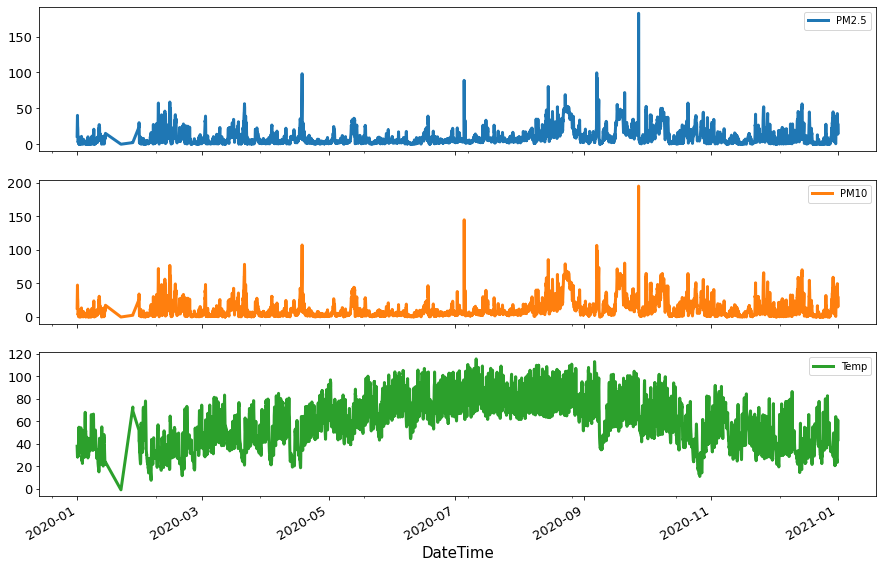

In [36]:
data_AQ_2020=df_cgp1_mod2[['PM2.5','PM10','Temp']]
data_AQ_2020.plot(figsize=(15,10), linewidth=3, fontsize=13, subplots=True)
plt.xlabel('DateTime', fontsize=15);

<AxesSubplot:xlabel='DateTime'>

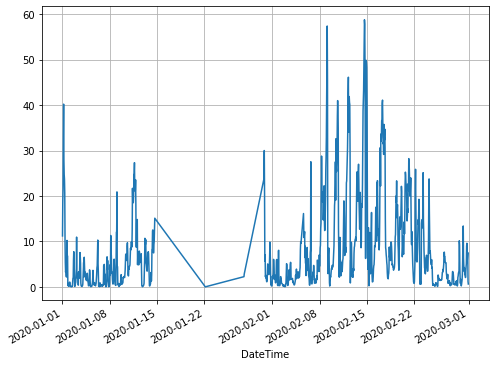

In [18]:
# PM2.5 in Jan 2020
data_jan = df_cgp1_mod2.loc['2020-01':'2020-02']
data_PM25_jan = data_jan['PM2.5']
data_PM25_jan.plot(grid=True)

<AxesSubplot:xlabel='DateTime'>

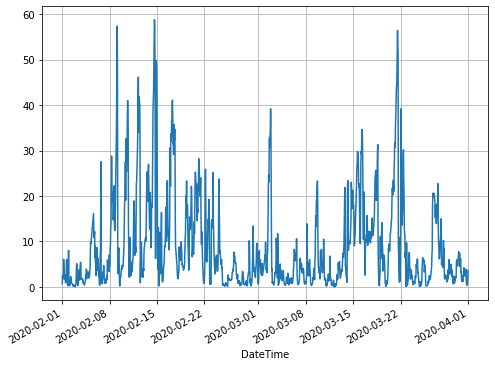

In [19]:
# PM2.5 in Feb 2020
data_feb = df_cgp1_mod2.loc['2020-02':'2020-03']
data_PM25_feb = data_feb['PM2.5']
data_PM25_feb.plot(grid=True)

<AxesSubplot:xlabel='DateTime'>

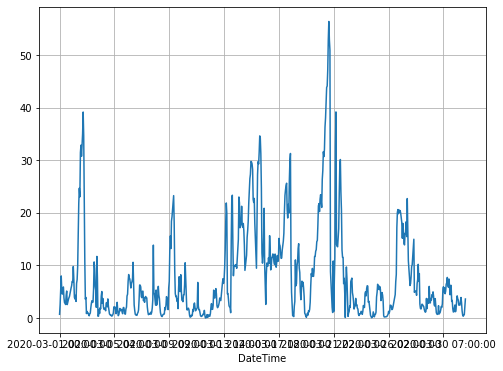

In [17]:
# PM2.5 in Mar 2020
data_mar = df_cgp1_mod2.loc['2020-03':'2020-04']
data_PM25_mar = data_mar['PM2.5']
data_PM25_mar.plot(grid=True)

In [18]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [19]:
import plotly.express as px
fig = px.line(df_cgp1_mod2_non_indexed, x='DateTime', y='PM2.5', title='PM2.5 with Slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [21]:
df_cgp1_mod2

PM2.5   PM10   Temp
DateTime                                
2020-01-01 01:00:00  11.21  13.41  37.70
2020-01-01 02:00:00  18.54  21.28  34.52
2020-01-01 03:00:00  21.53  24.61  32.38
2020-01-01 04:00:00  33.45  38.93  29.77
2020-01-01 05:00:00  40.22  47.52  28.13
...                    ...    ...    ...
2020-03-31 20:00:00   0.52   0.64  73.36
2020-03-31 21:00:00   0.63   0.80  72.23
2020-03-31 22:00:00   2.20   2.55  78.01
2020-03-31 23:00:00   3.61   4.20  75.76
2020-04-01 00:00:00   1.80   2.05  78.76

[1785 rows x 3 columns]

In [22]:
df_cgp1_mod2['year'] = pd.DatetimeIndex(df_cgp1_mod2_non_indexed['DateTime']).year

In [24]:
df_cgp1_mod2['month'] = pd.DatetimeIndex(df_cgp1_mod2_non_indexed['DateTime']).month

In [26]:
df_cgp1_mod2['day'] = pd.DatetimeIndex(df_cgp1_mod2_non_indexed['DateTime']).day

PM2.5   PM10   Temp  year  month  day
DateTime                                                  
2020-01-01 01:00:00  11.21  13.41  37.70  2020      1    1
2020-01-01 02:00:00  18.54  21.28  34.52  2020      1    1
2020-01-01 03:00:00  21.53  24.61  32.38  2020      1    1
2020-01-01 04:00:00  33.45  38.93  29.77  2020      1    1
2020-01-01 05:00:00  40.22  47.52  28.13  2020      1    1
...                    ...    ...    ...   ...    ...  ...
2020-03-31 20:00:00   0.52   0.64  73.36  2020      3   31
2020-03-31 21:00:00   0.63   0.80  72.23  2020      3   31
2020-03-31 22:00:00   2.20   2.55  78.01  2020      3   31
2020-03-31 23:00:00   3.61   4.20  75.76  2020      3   31
2020-04-01 00:00:00   1.80   2.05  78.76  2020      4    1

[1785 rows x 6 columns]

In [28]:
df_cgp1_mod2['2020':'2021'][['month','PM2.5']].groupby('month').describe()

PM2.5                                                       
       count      mean        std   min    25%    50%    75%    max
month                                                              
1      360.0  4.778778   6.219556  0.00  0.565  2.655   6.26  40.22
2      683.0  9.860088  11.168350  0.01  1.945  5.370  13.97  58.79
3      741.0  7.941916   9.119608  0.00  1.760  4.420  10.80  56.44
4        1.0  1.800000        NaN  1.80  1.800  1.800   1.80   1.80

In [30]:
df_cgp1_mod2['2020':'2021'][['month','PM2.5', 'PM10', 'Temp']].groupby('month').agg({'PM2.5':['max'], 'Temp':['min','max']})

PM2.5   Temp       
         max    min    max
month                     
1      40.22  -1.00  72.54
2      58.79   7.45  77.89
3      56.44  20.95  83.19
4       1.80  78.76  78.76

array([<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
       <AxesSubplot:xlabel='DateTime'>], dtype=object)

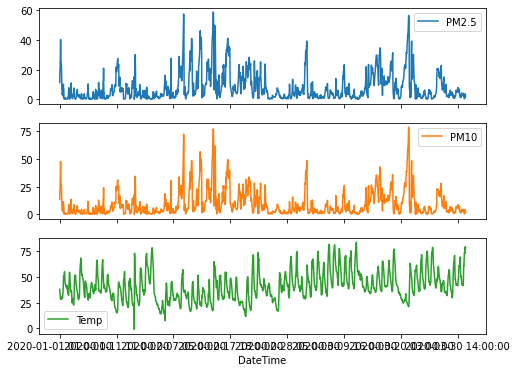

In [31]:
pm_data_2020=df_cgp1_mod2[['PM2.5','PM10','Temp']]
pm_data_2020.plot(subplots=True)

array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'Temp'}>]], dtype=object)

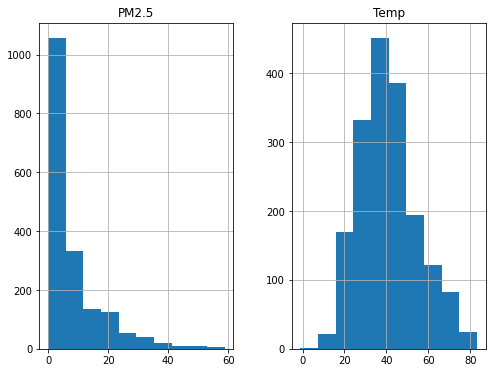

In [32]:
df_cgp1_mod2[['PM2.5','Temp',]].hist()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

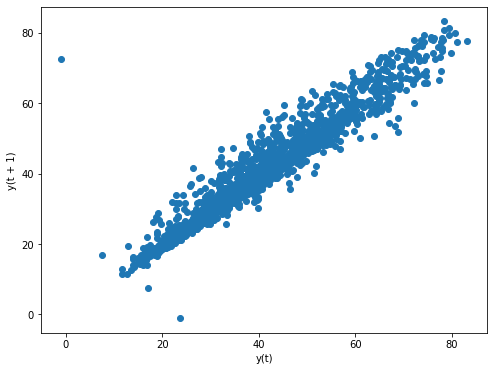

In [35]:
pd.plotting.lag_plot(df_cgp1_mod2['Temp'],lag=1)

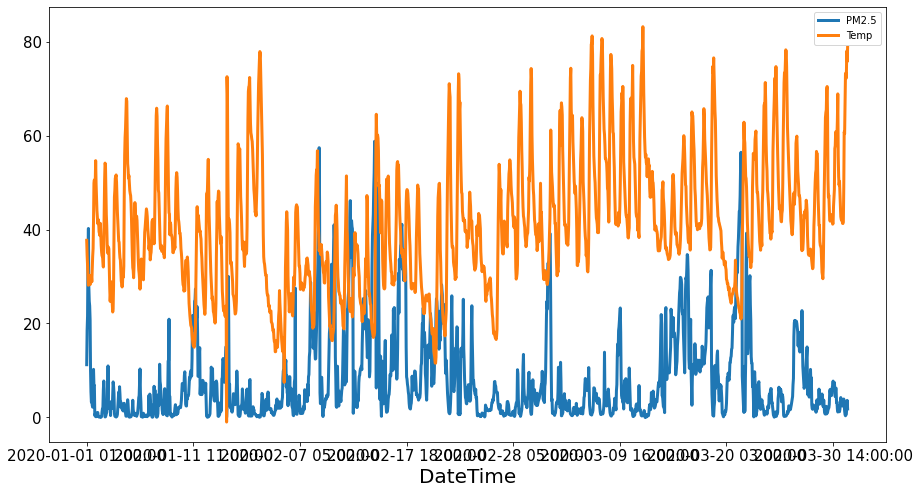

In [39]:
df_cgp1_mod2['2020':'2021'][['PM2.5','Temp']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('DateTime', fontsize=20);

In [43]:
df_cgp1_mod2.isnull().values.any()

False

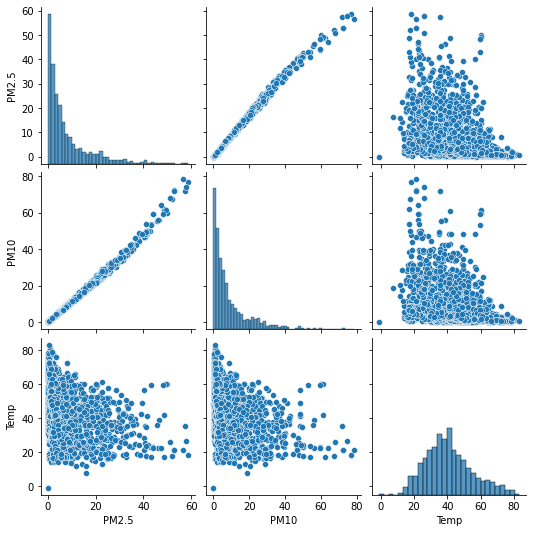

In [45]:
g = sns.pairplot(df_cgp1_mod2[['PM2.5','PM10','Temp']])

In [46]:
df_cgp1_mod2_corr=df_cgp1_mod2[['PM2.5','PM10','Temp']].corr(method='pearson')
df_cgp1_mod2_corr

PM2.5      PM10      Temp
PM2.5  1.000000  0.997110 -0.300574
PM10   0.997110  1.000000 -0.308295
Temp  -0.300574 -0.308295  1.000000

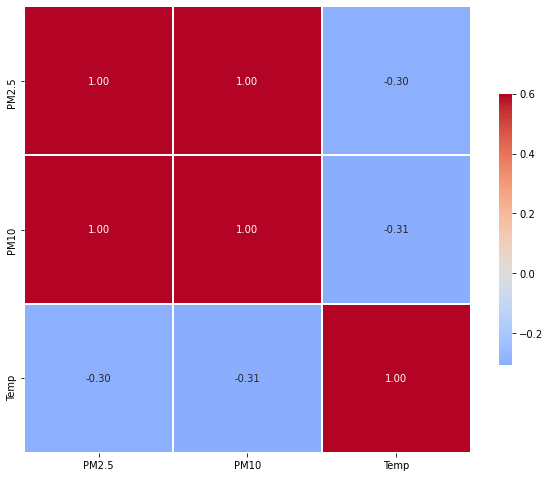

In [47]:
g = sns.heatmap(df_cgp1_mod2_corr,  vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
plt.show()

In [50]:
df_cgp1_mod2_na = df_cgp1_mod2.copy()
df_cgp1_mod2_na=df_cgp1_mod2_na.dropna()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

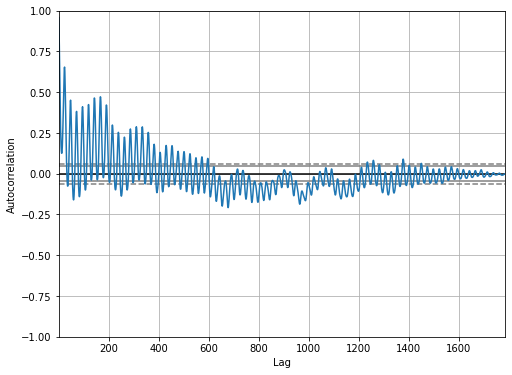

In [51]:
pd.plotting.autocorrelation_plot(df_cgp1_mod2_na['2020':'2021']['Temp'])